Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.
Файл доступен тут -
https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing
Признаки:
1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты



# Задание 1

Загрузите файл HR.csv в pandas dataframe

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# Задание 2

Рассчитайте основные статистики для переменных
(среднее,медиана,мода,мин/макс,сред.отклонение).

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Видим что пропусков нет

In [4]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


По основным статистикам выбросов и аномалльных значений не наблюдается. Однако в столбце с количеством рабочих часов в месяц максимальное значение - 310, что соотвествует работе по 10 с лишним часов без выходных в течение месяца. Это значение может сообтветсвовать истине, хоть и является очень большим. Сотрудники явно перерабатывают, ведь среднее значение рабочих часов  - 201, при норме при максимальных 22 рабочих днях - 176 часов.


Подсчитаем медиану для числовых столбцов

In [6]:
df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours','time_spend_company']].median()

satisfaction_level        0.64
last_evaluation           0.72
number_project            4.00
average_montly_hours    200.00
time_spend_company        3.00
dtype: float64

Здесь можем увидеть все основные статистики по столбцам. Для категориальных столбцов work_accident (были ли несчастные случаи), left (уволился ли сотрудник), motion_last_5years (повышался ли сотрудник за последние пять лет), department (отдел в котором работает сотрудник), salary (относительный уровень зарплаты) нас больше интересует мода

In [7]:
df[['Work_accident', 'left', 'promotion_last_5years', 'department', 'salary']].mode()

,Work_accident,left,promotion_last_5years,department,salary
0,0,0,0,sales,low


Видим, что чаще несчестных случаев не было, сотрудник не увольнялся, повышений не было, больше всего сотрудников из отдела sales, и уровень зарплат у большинства низкий

In [8]:
df['Work_accident'].value_counts()

Work_accident
0    12830
1     2169
Name: count, dtype: int64

In [9]:
df['left'].value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

In [10]:
df['promotion_last_5years'].value_counts()

promotion_last_5years
0    14680
1      319
Name: count, dtype: int64

In [11]:
df['department'].value_counts()

department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

In [12]:
df['salary'].value_counts()

salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64

# Задание 3
Рассчитайте и визуализировать корреляционную матрицу для
количественных переменных.
Определите две самые скоррелированные и две наименее
скоррелированные переменные.

Рассчитаем матрицу корреляций для столбцов satisfaction_level,	last_evaluation,	number_project,	average_montly_hours,	time_spend_company. Рассчитаем корреляцию Пирсона, т.к. выбросов в данных нет и считаем корреляцию только по числовым столбцам

In [13]:
df1 = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']]
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
0,0.38,0.53,2,157,3
1,0.80,0.86,5,262,6
2,0.11,0.88,7,272,4
3,0.72,0.87,5,223,5
4,0.37,0.52,2,159,3


In [14]:
corr_matrix_pearson = df1.corr()
corr_matrix_pearson

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

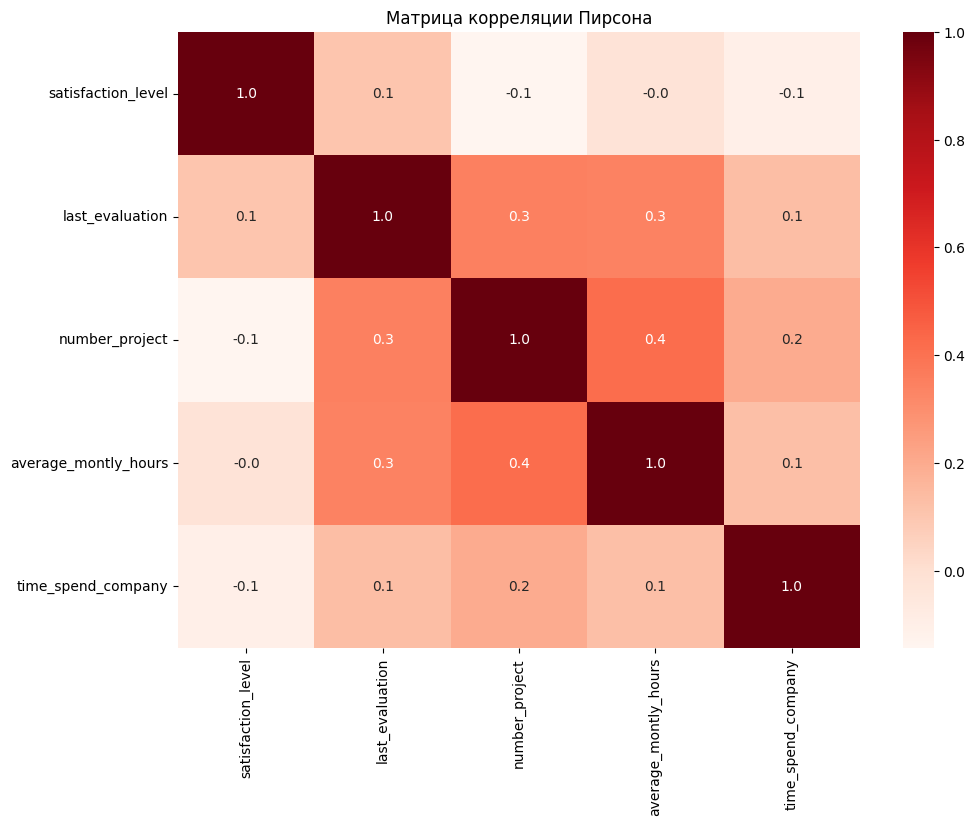

In [16]:
plt.figure(figsize=[11, 8])
sns.heatmap(corr_matrix_pearson, annot=True, cmap='Reds', fmt='.1f')
plt.title("Матрица корреляции Пирсона")
plt.show()

Видим самую высокую корреляцию у параметров - среднее кол-во рабочих часов в месяц и число проектов (что вполне логично - чем больше проектов у сотрудника, тем больше рабочего времени ему нужно), наименьшая корреляция у параметров - среднее кол-во рабочих часов в месяц и уровень удовлетворенности работой

# Задание 4

Рассчитайте сколько сотрудников работает в каждом
департаменте.

In [17]:
df['department'].value_counts()

department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

Видим что больше всего сотрудников работает в отделе продаж - 4140 чел, а наименьшее - в отделе менеджмента (управления) - 630

# Задание 5

Показать распределение сотрудников по зарплатам.

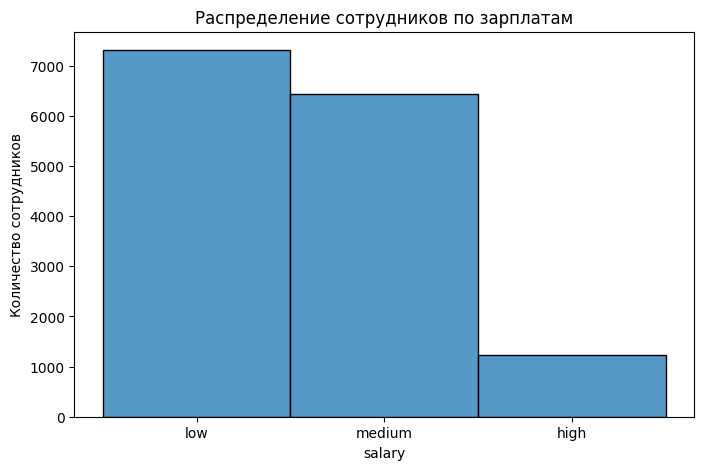

In [18]:
plt.figure(figsize=[8, 5])
sns.histplot(df['salary'], bins=25, legend=True)
plt.title("Распределение сотрудников по зарплатам")
plt.ylabel("Количество сотрудников")
plt.show()


Большинство сотрудников (больше 7 тысяч) получают низкую зарплату, около 6,5 тысяч получают среднюю зарплату и лишь чуть больше тысячи сотрудников получают высокую зарплату. Думаю подобное распределение будет встречаться у большинства компаний - много сотрудников младшего звена, получающие невысокую зарплату, чуть меньше руководителей среднего звена и небольшое количество управляющих и высококвалифицированных сотрудников получающих высокую зарплату

# Задание 6

Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности

In [19]:
def plot_(data, dep):
  plt.figure(figsize=[6, 3])
  sns.histplot(data, bins=25, legend=True)
  plt.title(f'Распределение сотрудников по зарплатам в отделе {dep}')
  plt.ylabel("Количество сотрудников")
  return plt.show()


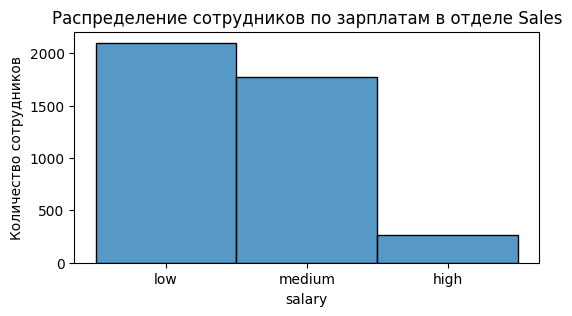

In [20]:
plot_(df['salary'].loc[df['department'] == 'sales'], 'Sales')

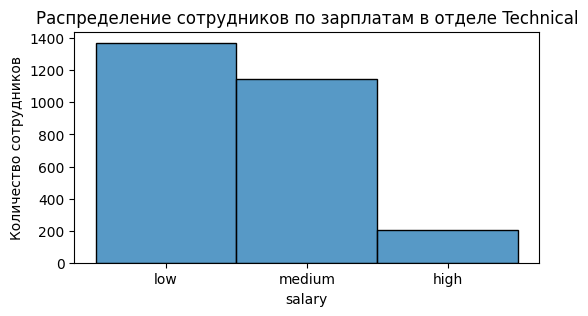

In [21]:
plot_(df['salary'].loc[df['department'] == 'technical'], 'Technical')

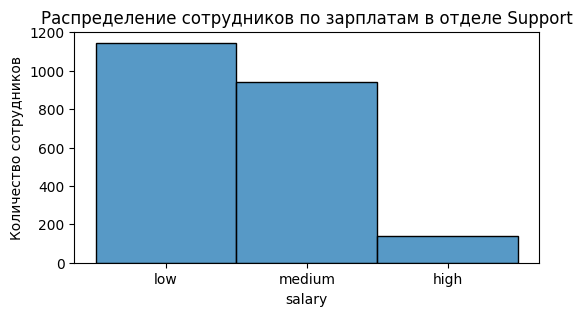

In [22]:
plot_(df['salary'].loc[df['department'] == 'support'], 'Support')

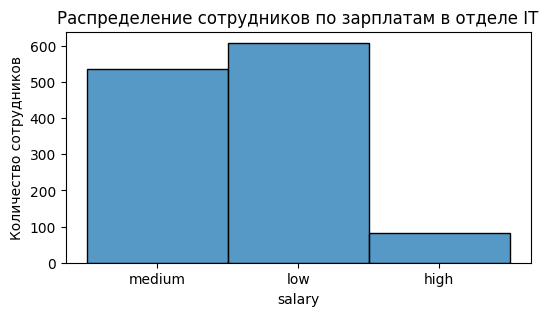

In [23]:
plot_(df['salary'].loc[df['department'] == 'IT'], 'IT')

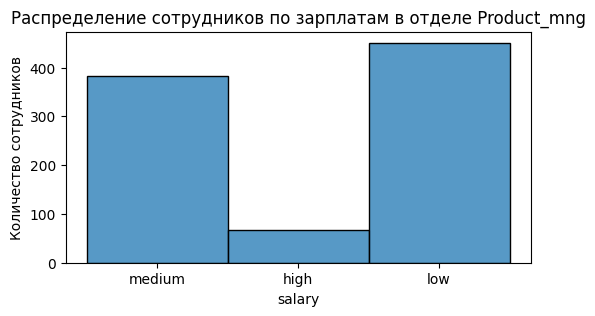

In [24]:
plot_(df['salary'].loc[df['department'] == 'product_mng'], 'Product_mng')

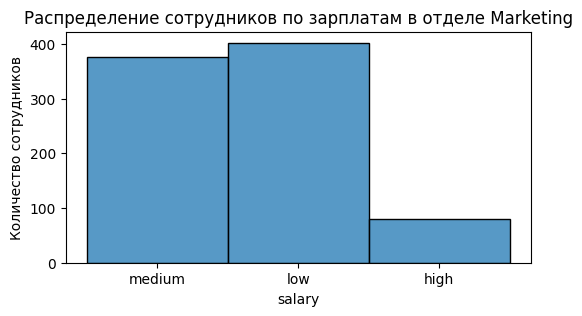

In [25]:
plot_(df['salary'].loc[df['department'] == 'marketing'], 'Marketing')

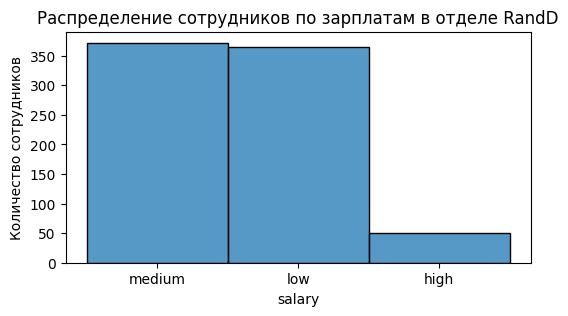

In [26]:
plot_(df['salary'].loc[df['department'] == 'RandD'], 'RandD')

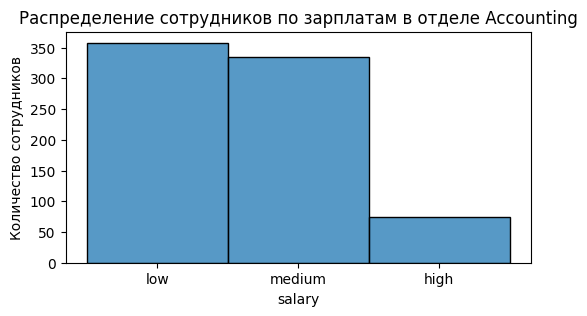

In [27]:
plot_(df['salary'].loc[df['department'] == 'accounting'], 'Accounting')

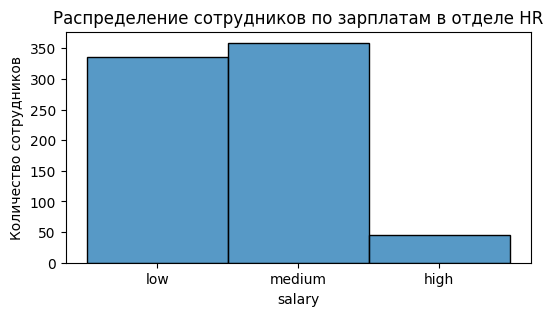

In [28]:
plot_(df['salary'].loc[df['department'] == 'hr'], 'HR')

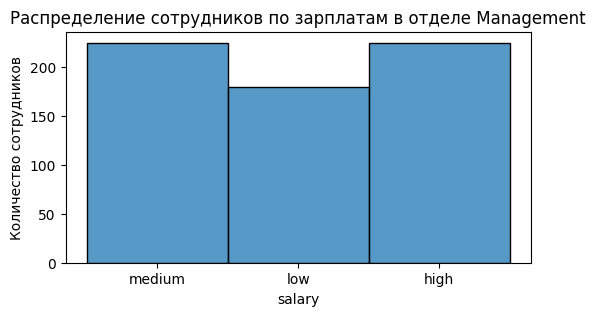

In [29]:
plot_(df['salary'].loc[df['department'] == 'management'], 'Management')

Посмотрим на распредления на одном графике

In [30]:

sal_count = pd.pivot_table(data=df, index='department', columns='salary', values= 'left', aggfunc='count')
sal_count

salary,high,low,medium
department,,,
IT,83,609,535
RandD,51,364,372
accounting,74,358,335
hr,45,335,359
management,225,180,225
marketing,80,402,376
product_mng,68,451,383
sales,269,2099,1772
support,141,1146,942


<Axes: xlabel='department'>

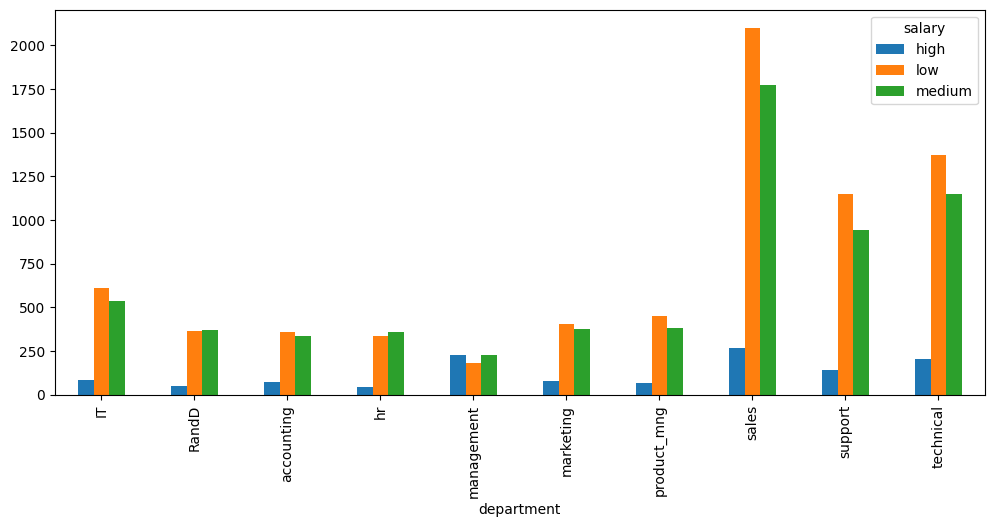

In [31]:
sal_count.plot.bar(figsize=(12, 5))

Видим что в большинстве отделов распредление сотрудников по зарплатам такое же как и распредление по всей компании. Однако в отделе RandD и hr чуть больше сотрудников получают среднюю зарплату, чем низкую. В отделе management одинаковое количество сотрудников получает среднюю и высокую зарплату и меньшинство - низкую  

# Задание 7

Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом

In [32]:
import warnings
# Отключение предупреждений (warnings)
warnings.filterwarnings("ignore")

from scipy.stats import ttest_ind, t, norm, sem
from scipy.stats import f_oneway, shapiro, tukey_hsd

Выборка с высокой зарплатой

In [33]:
high_sal = df['average_montly_hours'].loc[df['salary'] == 'high']
high_sal

72       149
111      289
189      156
267      129
306      149
        ... 
14829    148
14868    130
14902    159
14941    131
14980    238
Name: average_montly_hours, Length: 1237, dtype: int64

Выборка с низкой зарплатой

In [34]:
low_sal = df['average_montly_hours'].loc[df['salary'] == 'low']
low_sal

0        157
3        223
4        159
5        153
6        247
        ... 
14994    151
14995    160
14996    143
14997    280
14998    158
Name: average_montly_hours, Length: 7316, dtype: int64

Проверим выборки на нормальность

In [35]:
def check_normality(data):
    #
    stat, p = shapiro(data)
    #
    if p < 0.05:
        print("Отклоняем нулевую гипотезу >> Данные распределены не нормально")
    else:
        print("Не отклоняем нулевую гипотезу >> Данные распределены нормально")

In [36]:
check_normality(high_sal)

Отклоняем нулевую гипотезу >> Данные распределены не нормально


In [37]:
check_normality(low_sal)

Отклоняем нулевую гипотезу >> Данные распределены не нормально


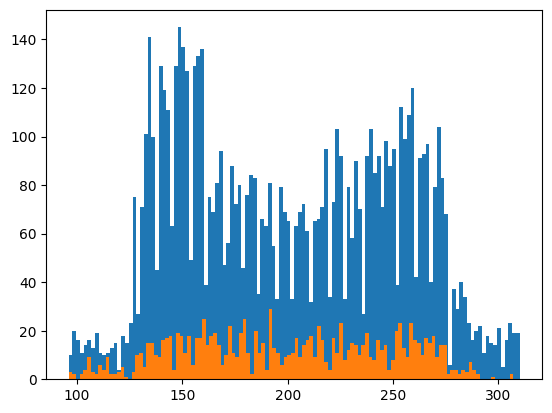

In [38]:
plt.hist(low_sal, bins=120);
plt.hist(high_sal, bins=120);

Т.к. данные независимые и распредлены не нормально применим критерий Манна-Уитни. Нулевая гипотеза - распределения одинаковые, альтернативная - распределения отличаются

In [39]:
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(low_sal, high_sal)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')

Статистика = 4542795.50000, p = 0.82413
Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые


Можем сделать вывод, что время которые проводят на работе сотрудники с высоким окладом и сотрудники с низким окладом не имеет статистически значимых различий на уровне доверия 95%.

# Задание 8

Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):

● Доля сотрудников с повышением за последние 5 лет

● Средняя степень удовлетворенности

● Среднее количество проектов

Рассчитаем сначала для уволившихся сотрудников

In [40]:
df_left = df.loc[df['left'] == 1]
df_left

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [41]:
num_prom_left = (df_left['salary'].loc[df_left['promotion_last_5years'] == 1].count())/df_left['promotion_last_5years'].count()*100 # salary - рандомный столбец, чтобы посчитать кол-во
num_prom_left

0.5320638476617194

Доля сотрудников с повышением за 5 лет среди уволившихся - 0.5%

In [42]:
df_left['satisfaction_level'].mean()

0.4400980117614114

Средняя степень удовлетворенности работой - 0.44

In [43]:
df_left['number_project'].mean()

3.8555026603192384

Среднее количество проектов у одного сторудника, среди уволившихся - 3.8

Вычислим те же показатели для оставшихся сотрудников

In [44]:
df_stay = df.loc[df['left'] == 0]
df_stay

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2002,0.45,0.69,5,193,3,0,0,0,sales,low
2003,0.78,0.82,5,247,3,0,0,0,sales,low
2004,0.49,0.60,3,214,2,0,0,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14206,0.90,0.55,3,259,10,1,0,1,management,high
14207,0.74,0.95,5,266,10,0,0,1,management,high
14208,0.85,0.54,3,185,10,0,0,1,management,high
14209,0.33,0.65,3,172,10,0,0,1,marketing,high


In [45]:
num_prom_stay = (df_stay['salary'].loc[df_stay['promotion_last_5years'] == 1].count())/df_stay['promotion_last_5years'].count()*100 # salary - рандомный столбец, чтобы посчитать кол-во
num_prom_stay

2.6251312565628284

Среди не уволившихся сотрудников доля получивших повышение за последние 5 лет - 2,6%, процент не большой, но в 5 раз выше, чем среди уволившихся

In [46]:
df_stay['satisfaction_level'].mean()

0.666809590479524

Средняя степень удовлетворенности работой - 0.67, в 1,5 раза выше чем среди уволившихся

In [47]:
df_stay['number_project'].mean()

3.786664333216661

Среднее количество проектов у одного сторудника, среди оставшихся работать сотрудников - 3.8, такое же, как и у уволившихся

# Задание 9

Разделить данные на тестовую и обучающую выборки
Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary)
Оценить качество модели на тестовой выборки

In [48]:
df['left'].value_counts(normalize = True)

left
0    0.761917
1    0.238083
Name: proportion, dtype: float64

Видим дисбаланс выборок - 23% уволившихся сотрудников и 76% оставшихся

In [50]:
#  импортируем метрики для классификации
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

def print_all_metrics(y_true, y_pred, title = 'Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))

Построим модель бинарной классификации пользователей, где целевой признак — факт увольнения сотрудника.

Для того чтобы снизить влияние дисбаланса классов при разбиении выборки, в наборе данных используется специальный тип разбиения, который называется стратифицированным (stratified). Данное разбиение предполагает, что наблюдения, принадлежащие каждому из классов, гарантированно попадут в каждый из наборов данных в одинаковой пропорции.

In [49]:
# разделим наши данные на признаки (матрица X) и целевую переменную (y)
from sklearn.model_selection import train_test_split

X = df.drop(['left', 'department', 'salary'], axis = 1) # все столбцы кроме целевого и лишних
y = df['left']  # здесь будет left - целевая переменная

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Переходим к работе с моделью. Воспользуемся линейным дискриминантором (LDA).

In [93]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [51]:
from sklearn.linear_model import LogisticRegression # импортируем класс логистической регрессии - самая базовая прогнозная модель для прогноза категорий

lr_model = LogisticRegression(random_state=42)

# обучим модель лог.регрессии
lr_model.fit(X_train, y_train)

# воспользуемся уже обученной моделью, чтобы сделать прогнозы
lr_predictions = lr_model.predict(X_test)
#lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]

# выведем все метрики
print_all_metrics(y_test, lr_predictions, title='Метрики для модели логистической регрессии')

Метрики для модели логистической регрессии
	Accuracy: 0.77
	Precision: 0.54
	Recall: 0.26
	F1: 0.35


In [ ]:
# коэффициенты дискриминатных линий
lda.coef_

array([[-0.74267323,  0.85219529, -0.22192731,  2.79126754, -1.75975274,
        -3.32135416,  0.38600282, -0.01115632]])

Метрика `accuracy` является одной из метрик алгоритмов бинарной классификации и означает долю верно угаданных ответов из всех прогнозов. Чем ближе значение `accuracy` к 100%, тем лучше. В нашем случае она составляет 0.75 (75%), что является показателем того, что наша модель хорошо предсказывает положительные исходы. Однако, данная метрика хорошо работает только в случае, если классы сбалансированы, но мы ранее посчитали, что в нашей задаче классы имеют соотношение 24% : 76%, то есть баланс классов не соблюден. Так как классы не сбалансированны, то эта метрика скорей показывает не то, на сколько хорошо модель предсказывает положительные исходы (единицы, или увольнения в нашем случае), а то, насколько хорошо она определяет превалирующий класс.

Метрика `precision` говорит, какая доля прогнозов относительно "1" класса верна. `Precision` составляет 0.54.

Метрика `recall` нацелена на минимизацию противоположных рисков:  показывает, сколько реальных объектов "1" класса мы смогли обнаружить с помощью модели. Для нас, при несбансированной выборке самый полезный показатель, если мы хотим сконцентрироваться на тех, кто уйдет, чтобы их удержать. Она составляет  0.26 (хуже, чем  accuracy, как раз из-за дисбаланса классов и больше ошибок сконцентрировано в уволившихся). Чтобы максимизировать эту метрику, можно ее выбрать в качестве основной метрики качества и делать все модификации, улучшения модели для улучшения именно этого показателя.



F1 - средневзвешенная метрика по всем ошибкам

Text(50.722222222222214, 0.5, 'Факт')

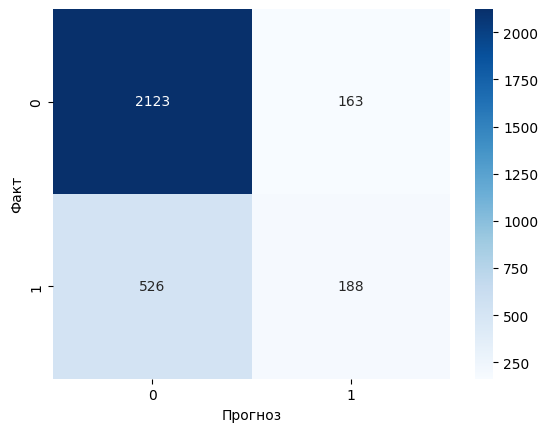

In [52]:
# матрица ошибок для модели
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, lr_predictions)
sns.heatmap(cm, annot=True, fmt='', cmap='Blues')
plt.xlabel('Прогноз')
plt.ylabel('Факт')

Видим, что верные прогнозы (по диагонали - 2123 и 188) - верно спронозировала оставшихся 2123 раз и верно спрогнозировала уволившихся 188 раз.

163 - ошибки по прогнозу оставшихся и 526 ошибки по прогнозу уволившихся.
Видим, что при прогнозе уволившихся ошибок больше, чем верных предсказаний

Используем алгоритм генерации искусственных данных — алгоритм SMOTE (Synthetic Minority Oversampling Techniques).

В основе алгоритма лежит идея генерации некоторого количества искусственных наблюдений, которые были бы «похожи» на наблюдения, имеющиеся в миноритарном классе, но при этом не дублировали их.

In [53]:
from imblearn.over_sampling import SMOTE

Создадим объект класса SMOTE и вызовем у него метод `fit_resample()`, передав в него обучающую выборку (X_train, y_train). Затем выведем количество наблюдений каждого из классов до и после сэмплирования:

In [54]:
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

print(f'Размерность тренировочной выборки до сэмплирования: {X_train.shape}')
print(f'Баланс классов до сэмплирования:\n{y_train.value_counts()}')
print('-'*40)
print(f'Размерность тренировочной выборки после сэмплирования: {X_train_smote.shape}')
print(f'Баланс классов после сэмплирования:\n{y_train_smote.value_counts()}')

Размерность тренировочной выборки до сэмплирования: (11999, 7)
Баланс классов до сэмплирования:
left
0    9142
1    2857
Name: count, dtype: int64
----------------------------------------
Размерность тренировочной выборки после сэмплирования: (18284, 7)
Баланс классов после сэмплирования:
left
0    9142
1    9142
Name: count, dtype: int64


In [59]:
from sklearn.metrics import classification_report

              precision    recall  f1-score   support

           0       0.91      0.76      0.83      2286
           1       0.50      0.77      0.60       714

    accuracy                           0.76      3000
   macro avg       0.70      0.76      0.72      3000
weighted avg       0.81      0.76      0.77      3000



Text(50.722222222222214, 0.5, 'Факт')

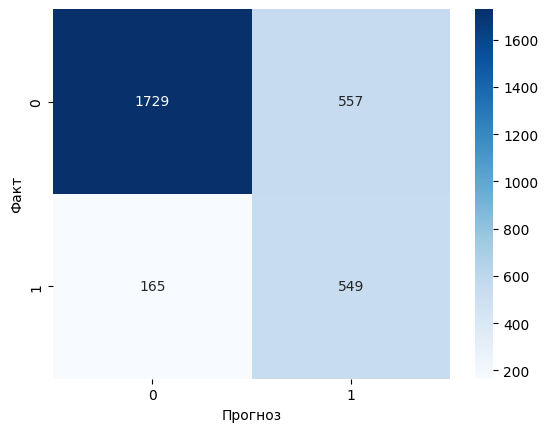

In [60]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_smote, y_train_smote)
lr_predictions = lr_model.predict(X_test)

print(classification_report(y_test, lr_predictions))

cm = confusion_matrix(y_test, lr_predictions)
sns.heatmap(cm, annot=True, fmt='', cmap='Blues')
plt.xlabel('Прогноз')
plt.ylabel('Факт')

Теперь модель верно спронозировала оставшихся 1729 раз (и 557 ошибок) и верно спрогнозировала уволившихся 549 раз (и 165 ошибок).
Для нас важнее предсказать возможных сотрудников, кто может уволиться, чтобы удержать их. Модель теперь предсказывает 77% возможных увольнений.